# Financial Distress Prediction

This data set deals with the financial distress prediction for a sample of companies.

#### Content

###### First column: Company represents sample companies.

###### Second column: Time shows different time periods that data belongs to. Time series length varies between 1 to 14 for each company.

###### Third column: The target variable is denoted by "Financial Distress" if it is greater than -0.50 the company should be considered as healthy (0). Otherwise, it would be regarded as financially distressed (1).

###### Fourth column to the last column: The features denoted by x1 to x83, are some financial and non-financial characteristics of the sampled companies. These features belong to the previous time period, which should be used to predict whether the company will be financially distressed or not (classification). Feature x80 is a categorical variable.

For example, company 1 is financially distressed at time 4 but company 2 is still healthy at time 14.

This data set is imbalanced (there are 136 financially distressed companies against 286 healthy ones i.e., 136 firm-year observations are financially distressed while 3546 firm-year observations are healthy) and skewed, so f-score should be employed as the performance evaluation criterion.

It should be noted that 30% of this data set should be randomly assigned as hold-out test set so the remaining 70% is used for feature selection and model selection i.e., train set.

### Import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

### Read 'Financial Distress.csv' dataset and store in a dataframe

In [2]:
df=pd.read_csv('Financial Distress.csv')[0:1000]

### View the bottom 5 rows

In [3]:
df.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [4]:
df.tail()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
995,86,14,-0.016638,0.69203,0.036375,0.81387,1.18760,0.09327,-0.236260,0.48565,...,91.700,227.50,214.500,21.000,20.5,8.6,25,0.32231,19,32
996,87,1,0.395200,1.23750,0.145580,0.78385,0.73812,0.15870,0.168410,0.59000,...,85.437,27.07,26.102,16.000,16.0,0.2,9,0.32060,7,28
997,87,2,0.394800,1.13360,0.103330,0.81017,0.74303,0.12100,0.098885,0.66365,...,107.090,31.31,30.194,17.000,16.0,0.4,9,0.39520,8,29
998,87,3,0.377900,1.09400,0.092668,0.84808,0.69709,0.12923,0.073930,0.72062,...,120.870,36.07,35.273,17.000,15.0,-0.2,9,0.39480,9,30
999,87,4,1.223500,1.10330,0.082483,0.86237,0.75854,0.11076,0.082367,0.73507,...,54.806,39.80,38.377,17.167,16.0,5.6,9,0.37790,10,31


### View info about this dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1000 non-null   int64  
 1   Time                1000 non-null   int64  
 2   Financial Distress  1000 non-null   float64
 3   x1                  1000 non-null   float64
 4   x2                  1000 non-null   float64
 5   x3                  1000 non-null   float64
 6   x4                  1000 non-null   float64
 7   x5                  1000 non-null   float64
 8   x6                  1000 non-null   float64
 9   x7                  1000 non-null   float64
 10  x8                  1000 non-null   float64
 11  x9                  1000 non-null   float64
 12  x10                 1000 non-null   float64
 13  x11                 1000 non-null   float64
 14  x12                 1000 non-null   float64
 15  x13                 1000 non-null   float64
 16  x14    

### View basic statistical information about this dataset

In [6]:
df.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.712000,7.003000,1.105413,1.231914,0.133784,0.658370,0.815773,0.165616,0.088091,0.676491,...,86.647776,84.725860,81.858357,17.572526,15.008500,-2.511600,20.840000,1.137706,17.346000,38.438000
std,24.210643,3.999874,1.606974,0.539673,0.120919,0.159184,0.326165,0.124833,0.204388,0.391107,...,17.825950,61.397179,61.064561,1.948701,2.703977,7.980897,7.385997,1.514085,9.655647,10.697036
min,1.000000,1.000000,-3.959400,0.202220,-0.165820,0.180280,0.091102,-0.187060,-0.573320,0.035160,...,54.806000,27.070000,26.102000,15.500000,12.000000,-20.200000,3.000000,-0.499220,1.000000,7.000000
25%,26.000000,3.750000,0.182517,0.935952,0.049313,0.552335,0.619640,0.081213,-0.039080,0.431470,...,79.951000,38.867500,37.601000,16.000000,13.000000,-7.000000,15.000000,0.188218,11.000000,31.000000
50%,47.000000,7.000000,0.697105,1.166000,0.109490,0.670545,0.785335,0.143065,0.105085,0.625580,...,87.100000,66.120000,59.471000,17.000000,14.500000,0.200000,23.000000,0.697040,15.000000,40.000000
75%,66.000000,10.000000,1.536225,1.417275,0.197105,0.781998,0.954828,0.228793,0.218150,0.817673,...,93.883000,100.000000,100.000000,18.000000,16.000000,2.100000,28.000000,1.492875,21.000000,46.000000
max,87.000000,14.000000,11.592000,5.621400,0.621610,0.964710,2.733000,0.671480,0.658380,4.511100,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,29.000000,11.592000,48.000000,62.000000


### Check for any null values in this dataset

In [7]:
df.isnull().sum()

Company               0
Time                  0
Financial Distress    0
x1                    0
x2                    0
                     ..
x79                   0
x80                   0
x81                   0
x82                   0
x83                   0
Length: 86, dtype: int64

In [8]:
new_df=df[['Company','Time','Financial Distress','x1','x2','x3','x4','x5','x6','x7','x8']]

In [9]:
new_df.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030


## Visualization

### Plot pair plot of this dataset

C:\Users\sheri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


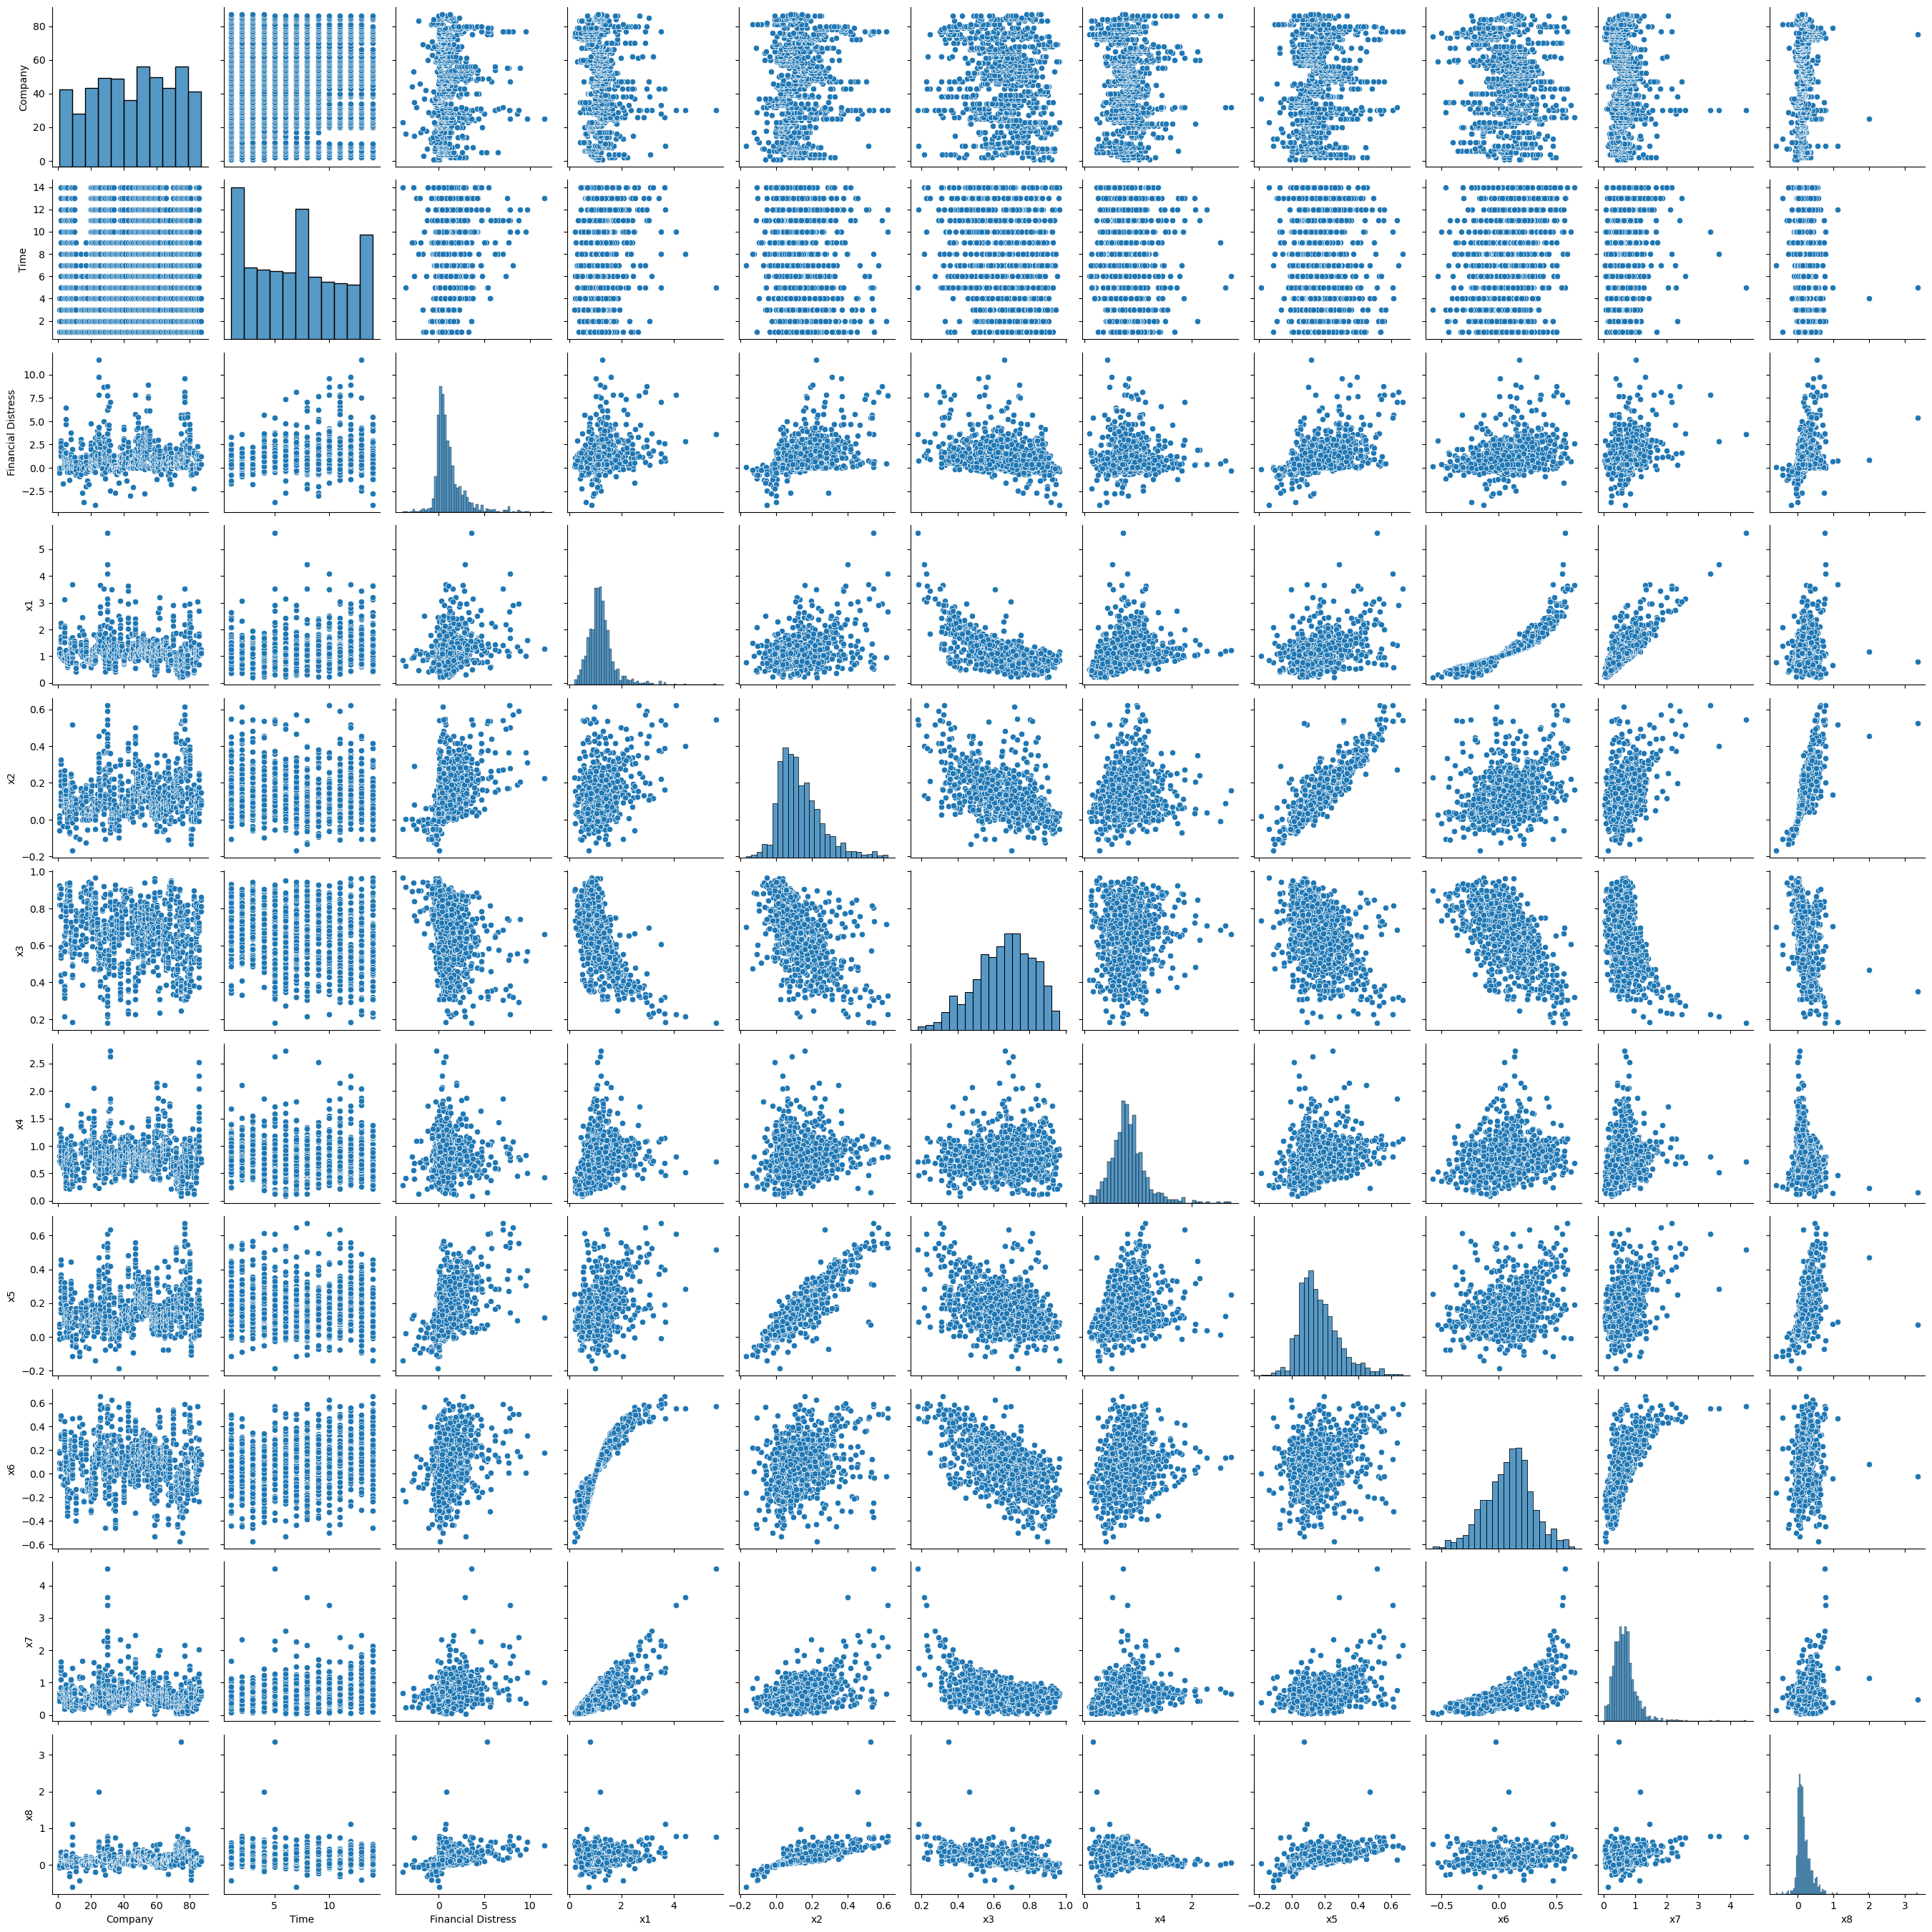

In [10]:
sns.pairplot(new_df)

### Plot the heatmap to view the correlation between the input and target variable

<Axes: >

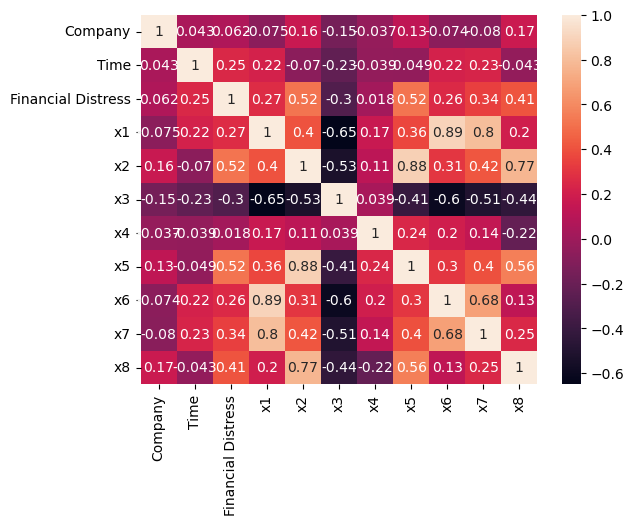

In [11]:
sns.heatmap(new_df.corr(),annot=True)

### Split the dataset into input and target variable

In [12]:
x=df.drop(columns='Financial Distress')
y=df['Financial Distress']

In [13]:
x

,Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,1.28100,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,1.27000,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,1.05290,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,1.11310,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.06230,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,86,14,0.69203,0.036375,0.81387,1.18760,0.093270,-0.236260,0.48565,0.030629,...,91.700,227.50,214.500,21.000,20.5,8.6,25,0.322310,19,32
996,87,1,1.23750,0.145580,0.78385,0.73812,0.158700,0.168410,0.59000,0.197230,...,85.437,27.07,26.102,16.000,16.0,0.2,9,0.320600,7,28
997,87,2,1.13360,0.103330,0.81017,0.74303,0.121000,0.098885,0.66365,0.139070,...,107.090,31.31,30.194,17.000,16.0,0.4,9,0.395200,8,29
998,87,3,1.09400,0.092668,0.84808,0.69709,0.129230,0.073930,0.72062,0.132940,...,120.870,36.07,35.273,17.000,15.0,-0.2,9,0.394800,9,30


### Standardize the data with stardardscaler

In [14]:
scaler=StandardScaler()

In [15]:
x_scaled=scaler.fit_transform(x)

In [16]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [17]:
x.head()

,Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,-1.847715,-1.501548,0.091001,-0.917187,1.358668,1.228911,-0.838943,0.490384,-0.387277,-0.775868,...,-0.067956,-0.939534,-0.913529,-0.807365,0.366866,0.339931,0.157133,-0.711886,1.311184,0.987870
1,-1.847715,-1.251415,0.070608,-1.053543,1.020086,0.580141,-1.440205,0.454992,-0.137144,-0.834843,...,1.147342,-0.870440,-0.846485,-0.293946,0.366866,0.365004,0.157133,-0.744763,1.414802,1.081401
2,-1.847715,-1.001282,-0.331874,-1.598253,1.659603,-0.265377,-1.163249,-0.211597,-0.623085,-1.251602,...,1.920759,-0.792874,-0.763269,-0.293946,-0.003145,0.289787,0.157133,-1.053094,1.518421,1.174932
3,-1.847715,-0.751149,-0.220269,-1.232952,1.260242,-0.018507,-0.717945,0.014400,-0.002637,-0.954539,...,-1.787153,-0.732091,-0.712412,-0.208205,0.366866,1.016886,0.157133,-0.966807,1.622039,1.268462
4,-1.806390,-1.501548,-0.314447,-0.221451,0.981935,0.061830,0.275260,-0.197230,0.167581,-0.257915,...,-0.067956,-0.939534,-0.913529,-0.807365,0.366866,0.339931,1.105346,0.074864,-1.072034,-1.069803


### Split dataset into training and testing set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Check the shape of x_train and x_test

In [20]:
x_train.shape

(800, 85)

In [21]:
x_test.shape

(200, 85)

### Create support vector machine and train it

In [22]:
model=LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

### Check the score the model

In [24]:
model.score(x_train,y_train)

0.7118688873247576

### Make prediction with x_test 

In [25]:
y_pred=model.predict(x_test)

###  Check the mean_squared_error of the model

In [26]:
mean_squared_error(y_pred,y_test)

0.8857822749794886

###  Check the mean_absolute_error of the model

In [27]:
mean_absolute_error(y_pred,y_test)

0.6375616948840711

### Check the r2 score of the model

In [28]:
r2_score(y_pred,y_test)

0.4218544110750876